##  Imports<a id='3.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

Objectives

To investigate the potential causes of road accidents in the US and find patterns to demonstrate the causes. This database will help to reject/accept the following null hypothesis(problem statements)

Null Hypothesis 1: Environmental factors do not contribute to car accidents significantly.

Null Hypothesis 2: During Covid (2020-2021), there has not been any significant change in the pattern of accidents.

Null Hypothesis 3: Environmental factors and accident hotspots are not sufficient to predict real-time accidents.


## Load The Data<a id='3.4_Load_The_Data'></a>

In [3]:
df = pd.read_csv(r'C:\Users\Shweta\Documents\gitrepo\Capstonetwo\USaccidentsdata_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776051 entries, 0 to 2776050
Data columns (total 55 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   ID                     object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Number                 float64
 12  Street                 object 
 13  Side                   object 
 14  City                   object 
 15  County                 object 
 16  State                  object 
 17  Zipcode                object 
 18  Country                object 
 19  Timezone               object 
 20  Airport_Code           object 
 21  Weather_Timestamp      object 
 22  Temperature(F)    

In [5]:
# Changing settings in head function to view all columns.
pd.set_option('display.max_columns', 55)
pd.options.display.max_columns = 55
pd.set_option('display.max_columns', None)
df.head(50)


,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Date,Weather_Time,Month&Year,StartDate,StartTime,EndDate,EndTime
0,0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,00:53:00,Feb 2016,2016-02-08,00:37:08,2016-02-08,06:37:08
1,1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,05:58:00,Feb 2016,2016-02-08,05:56:20,2016-02-08,11:56:20
2,2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08,05:53:00,Feb 2016,2016-02-08,06:15:39,2016-02-08,12:15:39
3,3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016-02-08,06:54:00,Feb 2016,2016-02-08,06:51:45,2016-02-08,12:51:45
4,4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,07:53:00,Feb 2016,2016-02-08,07:53:43,2016-02-08,13:53:43
5,5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08,08:16:00,Feb 2016,2016-02-08,08:16:57,2016-02-08,14:16:57
6,6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,08:18:00,Feb 2016,2016-02-08,08:15:41,2016-02-08,14:15:41
7,7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,11:51:00,Feb 2016,2016-02-08,11:51:46

## Explore The Data <a id='3.5_Explore_The_Data'></a>

###  Analysing Statewise data with order to severity<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

In [6]:
state_summary_newind = df.set_index('State')
state_summary_newind.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Date,Weather_Time,Month&Year,StartDate,StartTime,EndDate,EndTime
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OH,0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,00:53:00,Feb 2016,2016-02-08,00:37:08,2016-02-08,06:37:08
OH,1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,05:58:00,Feb 2016,2016-02-08,05:56:20,2016-02-08,11:56:20
OH,2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08,05:53:00,Feb 2016,2016-02-08,06:15:39,2016-02-08,12:15:39
OH,3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016-02-08,06:54:00,Feb 2016,2016-02-08,06:51:45,2016-02-08,12:51:45
OH,4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,07:53:00,Feb 2016,2016-02-08,07:53:43,2016-02-08,13:53:43


<AxesSubplot:>

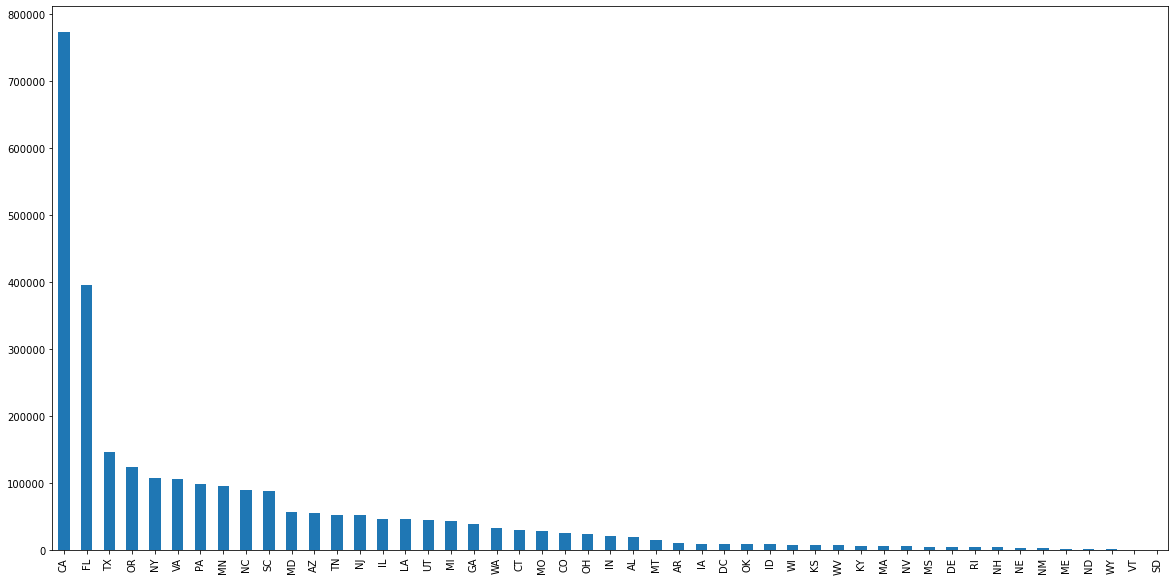

In [7]:
df['State'].value_counts().plot(kind='bar', figsize=(20,10))

Most accidents are in the state of California, Florida. May be it corresponds to population density. Howevet that is not what we want to know. Since accidents are only our focus, let move on to check how severe are these accidents state-wise.

In [8]:
# Creating a subset with states and severity
State_severity=df[['State','Severity']]
State_severity.head()

,State,Severity
0,OH,3
1,OH,2
2,OH,2
3,OH,2
4,OH,3


In [9]:
# Counting the each category of severity for every state
temp1=State_severity.pivot_table(index='State', columns='Severity', aggfunc='size')
print(temp1)

Severity       1         2        3       4
State                                      
AL         110.0   17269.0    762.0   896.0
AR          11.0    9249.0    288.0  1236.0
AZ        6036.0   43365.0   2080.0  3743.0
CA        4955.0  739758.0  19762.0  8859.0
CO         427.0   11709.0   8691.0  4077.0
CT           4.0   24662.0   2095.0  2878.0
DC          35.0    7777.0    334.0   636.0
DE           7.0    3418.0    367.0  1032.0
FL        2773.0  372700.0  11292.0  9370.0
GA         346.0   25326.0   6359.0  7180.0
IA           3.0    7511.0    456.0  1447.0
ID           NaN    7909.0    113.0   447.0
IL         249.0   23900.0  19643.0  3191.0
IN          41.0   14433.0   2682.0  3403.0
KS           5.0    6529.0    653.0   410.0
KY          33.0    5048.0    692.0   788.0
LA         999.0   43181.0   1171.0  1140.0
MA         127.0    4210.0   1603.0   412.0
MD         225.0   44650.0   4688.0  7015.0
ME           NaN    2037.0     36.0    95.0
MI          28.0   34457.0   372

<AxesSubplot:ylabel='State'>

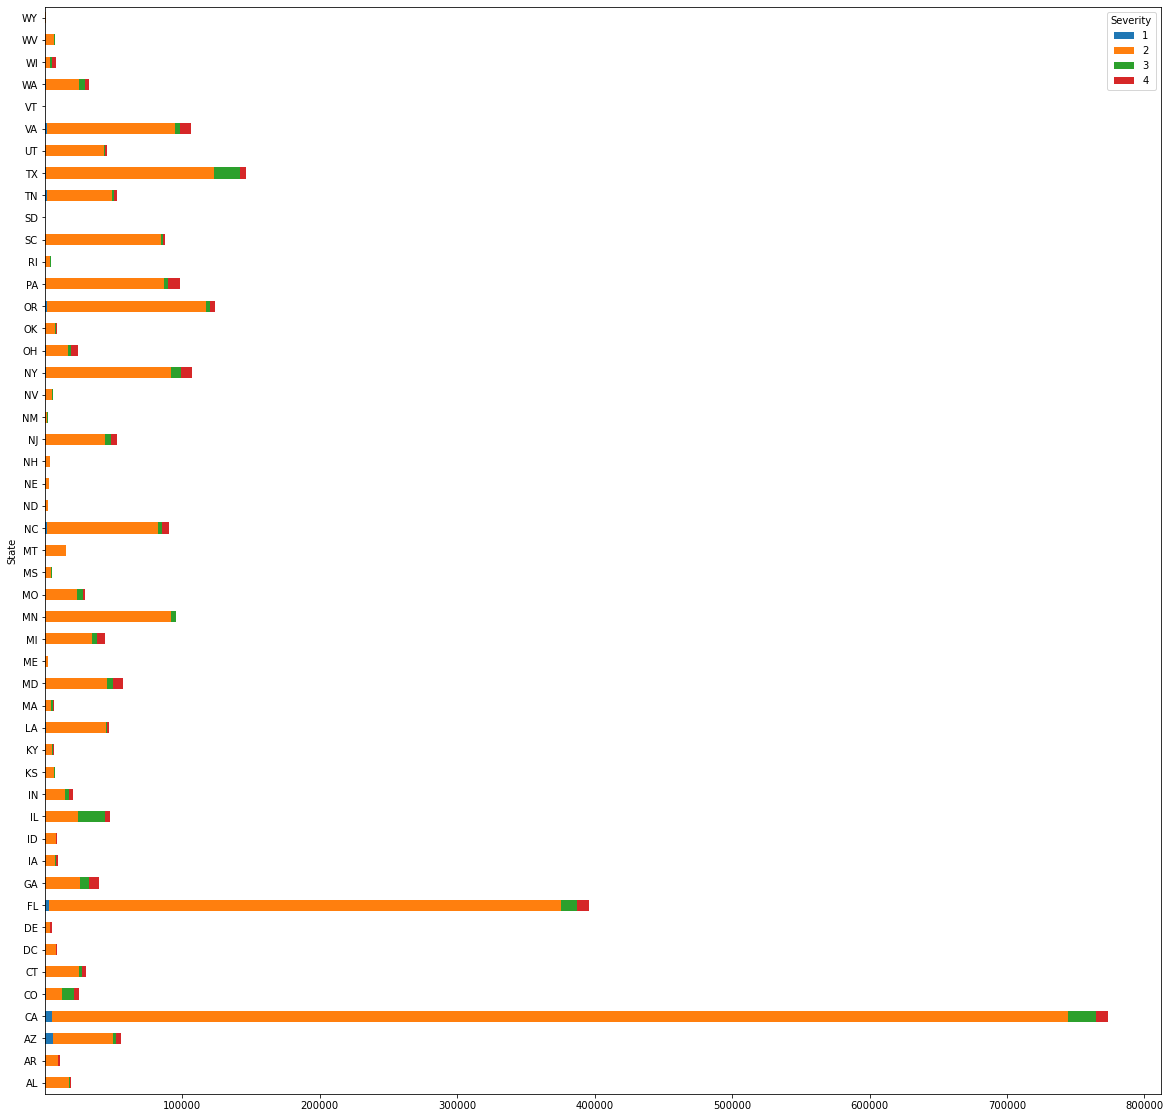

In [10]:
State_severity.pivot_table(index='State', columns='Severity', aggfunc='size').plot.barh(stacked=True, figsize=(20,20))

It is to be noted that '1' indicates least severe accidents. The above plot tells us that states CO, IL, and TX have a sizeable proportion of type 3 severe and above accidents. Severity can be a target variable that we can predict.

Twilight is the time between day and night when there is light outside, but the Sun is below the horizon.
Types of Twilight
There are three types of twilight:
Civil twilight
Civil twilight is the brightest form of twilight. There is enough natural sunlight during this period that artificial light may not be required to carry out outdoor activities.

Nautical twilight
This twilight period is less bright than civil twilight and artificial light is generally required for outdoor activities.
During this time, most stars can be easily seen with naked eyes, and the horizon is usually also visible in clear weather conditions.
    
Astronomical twilight
During astronomical twilight, most celestial objects can be observed in the sky. However, the atmosphere still scatters and refracts a small amount of sunlight, and that may make it difficult for astronomers to view the faintest objects.




In [11]:
#Lets filter the relevant columns to understand it better
df1=df[['Timezone','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','StartTime','Month&Year']]

In [12]:
df1[(df1['Sunrise_Sunset'] == 'Night') & (df1['Astronomical_Twilight'] == 'Day')].head(300)


,Timezone,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,StartTime,Month&Year
2,US/Eastern,Night,Night,Night,Day,06:15:39,Feb 2016
3,US/Eastern,Night,Night,Day,Day,06:51:45,Feb 2016
14,US/Eastern,Night,Day,Day,Day,18:11:11,Feb 2016
15,US/Eastern,Night,Day,Day,Day,18:11:11,Feb 2016
23,US/Eastern,Night,Night,Night,Day,06:10:59,Feb 2016
...,...,...,...,...,...,...,...
2353,US/Pacific,Night,Day,Day,Day,20:00:04,Apr 2016
2354,US/Pacific,Night,Day,Day,Day,20:10:01,Apr 2016
2355,US/Pacific,Night,Night,Day,Day,20:18:07,Apr 2016
2356,US/Pacific,Night,Night,Day,Day,20:20:25,Apr 2016


The above rows indicate sunset phases. 
The order during Sunset is - Sunset, Civil Twilight/Dusk, Nautical Twilight/Dusk, Astronomical Twilight/Dusk and then Night. 
The order during Sunrise is - Astronomical Twilight/Dawn, Nautical Twilight/Dawn, Civil Twilight/Dawn and then Sunrise. 

However the rows below are not exactly following the order. For instance index 127921 shows a Twilight at 3:00 PM in Jun PST. This is very unlikely because Jun is a summer month and 3:00 PM cannot be a twilight time. Similarly index 243701 indicates Twilight at 1:pm in Jun PST, which is also unlikely. 

Hence we may be looking at erroneous data.To be on safer side and avoid misinterpretation, we can consolidate all the twilights into one single column or we can just prefer to leave them out and consider Sunset and Sunrise only. Since there is possiblity of erroneous Twilight data skewing the results, we would prefer to go with the latter option.

In [13]:
df1[(df1['Sunrise_Sunset'] == 'Day') & (df1['Astronomical_Twilight'] == 'Night')].head(300)

,Timezone,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,StartTime,Month&Year
93380,US/Mountain,Day,Day,Day,Night,14:26:10,Jul 2016
127843,US/Pacific,Day,Day,Day,Night,14:42:11,Jun 2016
127921,US/Pacific,Day,Day,Day,Night,15:04:00,Jun 2016
127926,US/Pacific,Day,Day,Day,Night,15:28:49,Jun 2016
128077,US/Pacific,Day,Day,Day,Night,14:18:24,Jun 2016
...,...,...,...,...,...,...,...
236885,US/Central,Day,Day,Day,Night,20:49:00,Jul 2021
237747,US/Pacific,Day,Day,Day,Night,14:47:00,Jun 2021
242329,US/Central,Day,Day,Day,Night,15:38:00,Jun 2021
243701,US/Pacific,Day,Day,Day,Night,13:23:36,Jun 2021


In [14]:
# Dropping columns for Civil, Nautical and Astronomical Twilight. 
#df = df.drop(['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [15]:
# Checking the new dataframe
#df.info()

In [16]:
# Lets check how weather conditions impact accidents.Checking the unique values.
df['Weather_Condition'].unique()
# this shows a lot of unique values

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm',
       'Light Rain /

In [17]:
#get counts of each variable value
pd.set_option("display.max_rows", None)
df.Weather_Condition.value_counts()

Fair                                   1102071
Mostly Cloudy                           362941
Cloudy                                  347502
Partly Cloudy                           248959
Clear                                   173101
Light Rain                              128011
Overcast                                 84614
Scattered Clouds                         44921
Light Snow                               43606
Fog                                      41001
Haze                                     36094
Rain                                     30854
Fair / Windy                             15062
Heavy Rain                               11731
Smoke                                     7189
Light Drizzle                             7014
Thunder in the Vicinity                   6891
Cloudy / Windy                            6796
T-Storm                                   6520
Mostly Cloudy / Windy                     6289
Thunder                                   6001
Light Rain wi

The number of categorical values in Weather_Condition can be preferably reduced to a few buckets, so as to aid in analysis. This is called reducing the dimensionality. We notice that Wind speed has been already captured as a variable. So having entries like-"Partly Cloudy/Windy", "Light Rain/Windy" are just redundant information. Similarly Cloudy and overcast mean the same. This will be taken up further in pre-processing stage.

Lets analyse how accident severity changes with other different external factors. We could categorise the external factors as environmental factors and traffic management features.
Starting with day and night.

In [21]:
Daynight_severity=df[['Sunrise_Sunset','Severity']]

<AxesSubplot:ylabel='Severity'>

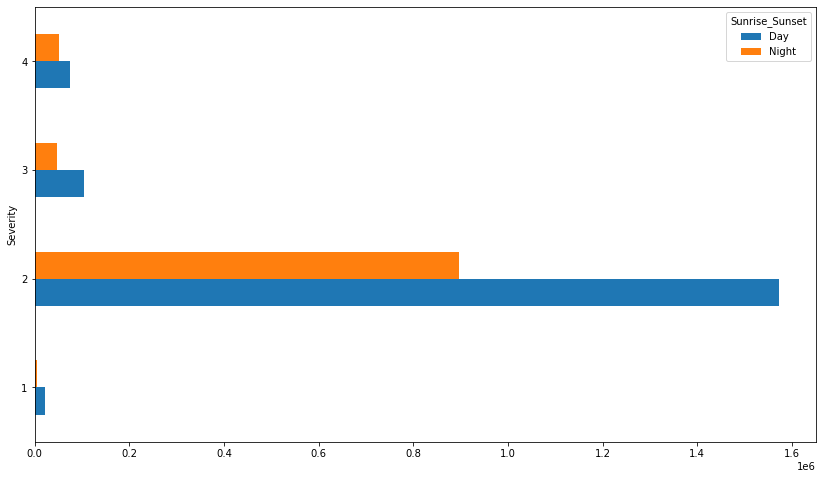

In [22]:
Daynight_severity.pivot_table(index='Severity', columns='Sunrise_Sunset', aggfunc='size').plot.barh(figsize=(14,8))

In contrast to popular notion that night driving could be dangerous, we notice that most accidents have occurred during the day

In [44]:
#Analysing wind speed and severity
Windspeed_severity=df[['Wind_Speed(mph)','Severity']]

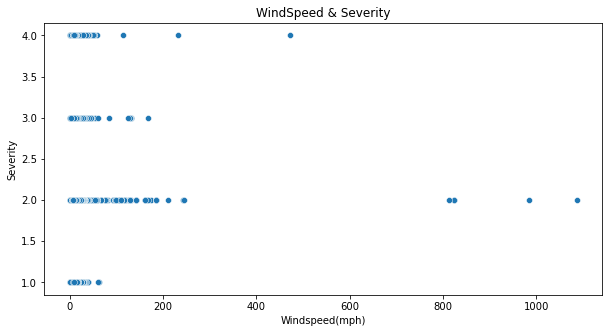

In [42]:
plt.figure(figsize=(10,5))
plt.title('WindSpeed & Severity')
plt.xlabel('Windspeed(mph)')
plt.ylabel('Severity')
sns.scatterplot(x=Windspeed_severity['Wind_Speed(mph)'],y=Windspeed_severity['Severity'])
plt.show()

Accidents with severity two show higher wind speed, however these could also be outliers.

In [50]:
df[df['Wind_Speed(mph)'] >= 200.00]

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Date,Weather_Time,Month&Year,StartDate,StartTime,EndDate,EndTime
11322,11454,A-11455,2,2016-06-13 15:58:19,2016-06-13 21:58:19,34.234870,-118.412160,34.232059,-118.407485,0.330,At CA-170 - Accident.,NaN,Golden State Fwy S,R,Pacoima,Los Angeles,CA,91331,US,US/Pacific,KWHP,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,SE,822.8,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-06-13,16:53:00,Jun 2016,2016-06-13,15:58:19,2016-06-13,21:58:19
11331,11463,A-11464,2,2016-06-13 17:11:24,2016-06-13 23:11:24,34.246890,-118.424900,34.242600,-118.420370,0.393,At Osborne St/Exit 154 - Accident.,NaN,Golden State Fwy S,R,Pacoima,Los Angeles,CA,91331,US,US/Pacific,KWHP,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,SE,822.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-06-13,16:53:00,Jun 2016,2016-06-13,17:11:24,2016-06-13,23:11:24
154085,157532,A-157533,4,2017-03-15 15:29:47,2017-03-15 21:29:47,26.935065,-80.160099,26.935065,-80.160099,0.000,Closed at Cortona Blvd - Road closed due to ac...,7999.0,W Indiantown Rd,R,Jupiter,Palm Beach,FL,33478,US,US/Eastern,KSUA,2017-03-15 14:47:00,62.6,NaN,45.0,30.19,7.0,NNW,471.8,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2017-03-15,14:47:00,Mar 2017,2017-03-15,15:29:47,2017-03-15,21:29:47
695484,710258,A-710259,2,2021-07-12 17:44:46,2021-07-12 20:04:38,32.958287,-96.913703,32.960179,-96.914805,0.146,Incident on I-35E NB near NORTHSIDE DR Drive w...,NaN,I-35E N,R,Carrollton,Dallas,TX,75006,US,US/Central,KADS,2021-07-12 17:47:00,84.0,84.0,55.0,29.36,10.0,SSW,812.0,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2021-07-12,17:47:00,Jul 2021,2021-07-12,17:44:46,2021-07-12,20:04:38
1385254,1414359,A-1414360,2,2021-09-16 13:46:00,2021-09-16 15:52:45,37.488323,-122.209264,37.489033,-122.212834,0.202,Accident on Woodside Rd exit [408] from Woodsi...,NaN,CA-84,R,Redwood City,San Mateo,CA,94063,US,US/Pacific,KSQL,2021-09-16 13:47:00,66.0,66.0,73.0,29.84,10.0,NNE,243.0,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2021-09-16,13:47:00,Sep 2021,2021-09-16,13:46:00,2021-09-16,15:52:45
1455920,1486460,A-1486461,2,2021-12-16 12:31:00,2021-12-16 14:44:36,37.328360,-120.559242,37.328225,-120.558982,0.017,Accident from N Gurr Rd to Ashby Rd.,4001.0,Ashby Rd,L,Atwater,Merced,CA,95301-5406,US,US/Pacific,KMER,2021-12-16 12:45:00,50.0,50.0,100.0,29.91,10.0,S,1087.0,0.0,Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2021-12-16,12:45:00,Dec 2021,2021-12-16,12:31:00,2021-12-16,14:44:36
1910187,1955910,A-1955911,2,2020-09-28 15:55:47,2020-09-28 17:57:42,32.918276,-96.833859,32.918790,-96.833988,0.036,Incident on CRESTLINE AVE near RICKOVER DR Exp...,12384.0,Crestline Ave,R,Dallas,Dallas,TX,75244,US,US/Central,KADS,2020-09-28 15:47:00,75.0,75.0,24.0,29.41,10.0,N,211.0,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2020-09-28,15:47:00,Sep 2020,2020-09-28,15:55:47,2020-09-28,17:57:42
2053479,2104007,A-2104008,4,2020-05-07 15:26:53,2020-05-07 16:01:51,32.682690,-97.240410,32.682690,-97.240410,0.000,At Martin St/Exit 33 - Accident. Hard shoulder...,NaN,E Loop 820,R,Fort Worth,T

A wind gust of 231 mph was measured on the Mount Washington Observatory on April 12, 1934. It remained the highest-ever anemometer-measured wind gust on Earth until an even higher gust was observed on Barrow Island, Australia, in 1996. 
On February 9, 2020, an anemometer at an elevation of 9186 feet on Mt. Kirkwood in the California Sierra reported a wind gust of 209 mph. This wind gust was the highest on record for the state of California and potentially the fourth highest gust measured by an anemometer at any site on Earth. So clearly, we have quite a few outliers in windspeed as indicated in the selection above.

In [51]:
#Analysing visibility and severity
Visi_severity=df[['Visibility(mi)','Severity']]

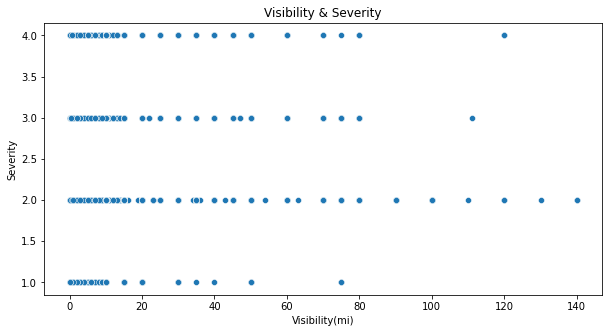

In [52]:
plt.figure(figsize=(10,5))
plt.title('Visibility & Severity')
plt.xlabel('Visibility(mi)')
plt.ylabel('Severity')
sns.scatterplot(x=Visi_severity['Visibility(mi)'],y=Visi_severity['Severity'])
plt.show()

Lower visbility area is packed with higher scatter points indicating low visibility during most accidents. There could be a cause and effect relationship here. This is not uncommon and can be connected to the weather conditions at that time.

Let us create a subset containing all environmental factors and severity.

In [85]:
env_factors=df[['Severity','Sunrise_Sunset','Visibility(mi)','Temperature(F)','Wind_Chill(F)','Wind_Speed(mph)','Weather_Condition','Humidity(%)','Pressure(in)','Wind_Direction','Precipitation(in)']]
env_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776051 entries, 0 to 2776050
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Sunrise_Sunset     object 
 2   Visibility(mi)     float64
 3   Temperature(F)     float64
 4   Wind_Chill(F)      float64
 5   Wind_Speed(mph)    float64
 6   Weather_Condition  object 
 7   Humidity(%)        float64
 8   Pressure(in)       float64
 9   Wind_Direction     object 
 10  Precipitation(in)  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 233.0+ MB


In [87]:
pd.options.display.float_format = '{:.2f}'.format
env_factors.describe()

,Severity,Visibility(mi),Temperature(F),Wind_Chill(F),Wind_Speed(mph),Humidity(%),Pressure(in),Precipitation(in)
count,2776051.00,2763696.00,2776051.00,2375687.00,2678267.00,2772239.00,2773261.00,2282814.00
mean,2.14,9.10,61.79,59.66,7.40,64.37,29.47,0.01
std,0.48,2.70,18.62,21.16,5.51,22.87,1.04,0.09
min,1.00,0.00,-33.00,-59.00,0.00,1.00,0.02,0.00
25%,2.00,10.00,50.00,46.00,3.50,48.00,29.31,0.00
50%,2.00,10.00,64.00,63.00,7.00,67.00,29.82,0.00
75%,2.00,10.00,76.00,76.00,10.00,83.00,30.01,0.00
max,4.00,140.00,120.00,120.00,1087.00,100.00,58.90,24.00


Visbilty max value could be an outlier. Column precipitation does not have a lot of values and hence can be deleted in the main dataframe. We have already identified wind speed outliers.

<AxesSubplot:>

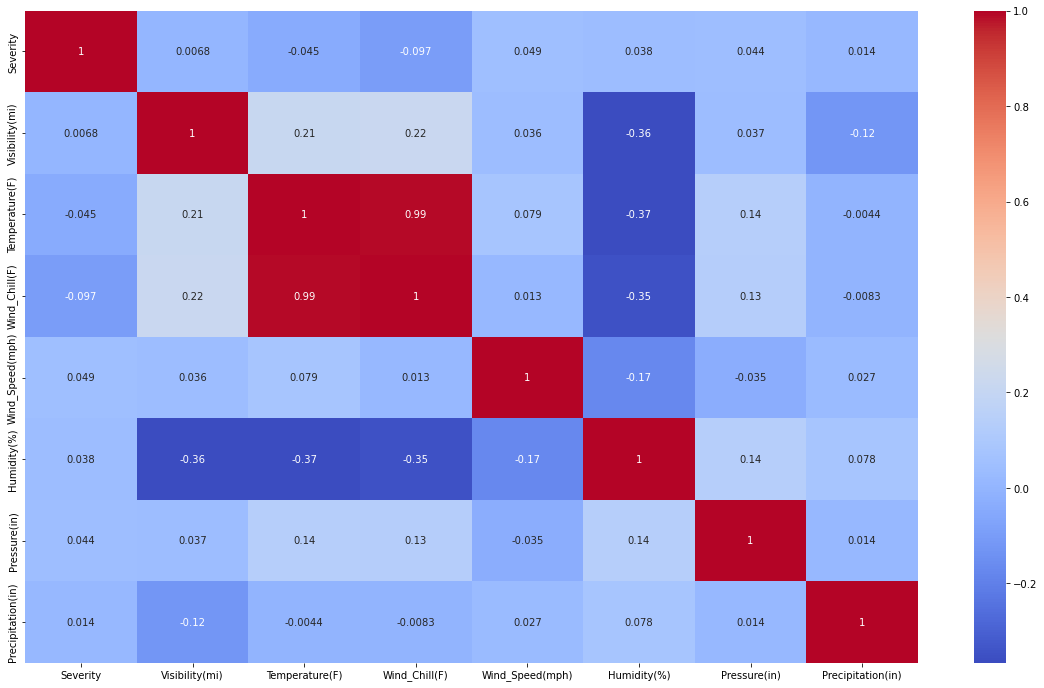

In [99]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(env_factors.corr(), annot=True, ax=ax, cmap= 'coolwarm')

We dont notice significantly high correlation, but variables like Visibility, Temperature and Wind_Chill definately show some correlation to Humidity. Wind_chill and Temperature columns give similar information, So we could proceed with either one of them. Retaining Wind_Chill is a better idea because it gives the actual temperature cahnges due to wind conditions. 

We can also subset a dataframe containing all the boolean variables pertaining to traffic management features.

In [82]:
Bool_severity=df[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Severity']]


<AxesSubplot:>

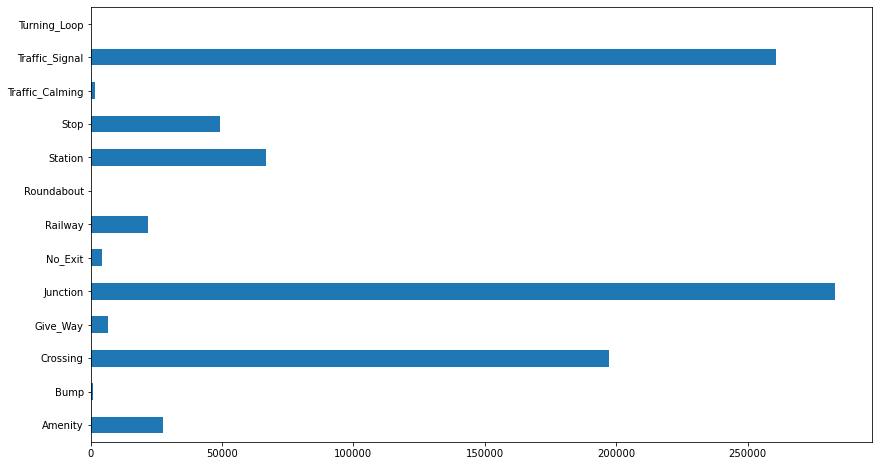

In [81]:
(Bool_severity[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']] == True).sum().plot.barh(figsize=(14,8))

These above boolean variables indicate that Junctions, Traffic Signals, Crossings have most number of accidents. Turning loop, Bump, and Roundabout have extremely low number of accidents. 